# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane seem to be the top two treatments for reducing tumor volume. The majority of the final tumor volumes measured for these two candidates are smaller than those recorded for tumors treated by other drugs. It would be beneficial to check that there is a random distribution of mouse weight across all treatments since data shows a strong correlation between mouse weight and tumor volume. 
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mice_count = mouse_data["Mouse ID"].nunique()
mice_count

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grp_mice = mouse_data.groupby(['Mouse ID','Timepoint'])
grp_count = grp_mice[['Mouse ID','Timepoint']].count()
multicount = grp_count.loc[grp_count['Mouse ID'] > 1]
multicount

Mouse ID  Timepoint
Mouse ID Timepoint                     
g989     0                 2          2
         5                 2          2
         10                2          2
         15                2          2
         20                2          2

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = mouse_data[mouse_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mouse_data.loc[mouse_data['Mouse ID'] != 'g989']
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_mice["Mouse ID"].nunique()
clean_mice_count

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_mice.groupby(['Drug Regimen']).mean().rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})
median = clean_mice.groupby(['Drug Regimen']).median().rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})
var = clean_mice.groupby(['Drug Regimen']).var().rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance'})
std = clean_mice.groupby(['Drug Regimen']).std().rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Dev.'})
sem = clean_mice.groupby(['Drug Regimen']).sem().rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Err.'})

tumor_mean = mean['Mean Tumor Volume']
tumor_median = median['Median Tumor Volume']
tumor_var = var['Tumor Volume Variance']
tumor_std = std['Tumor Volume Std. Dev.']
tumor_sem = sem['Tumor Volume Std. Err.']
# Assemble the resulting series into a single summary DataFrame.
tumor_stats = pd.concat([tumor_mean, tumor_median, tumor_var, tumor_std, tumor_sem], axis = 1)
tumor_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumorVol = clean_mice.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
tumorVol

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

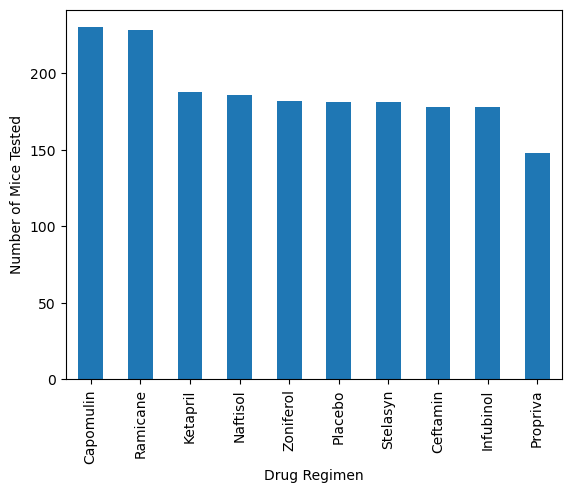

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = clean_mice.groupby('Drug Regimen').count()[['Timepoint']].sort_values(by=['Timepoint'], ascending=False)

timepoints.plot(kind="bar", legend=False, ylabel = 'Number of Mice Tested', width = 0.5)


Text(0, 0.5, 'Number of Mice Tested')

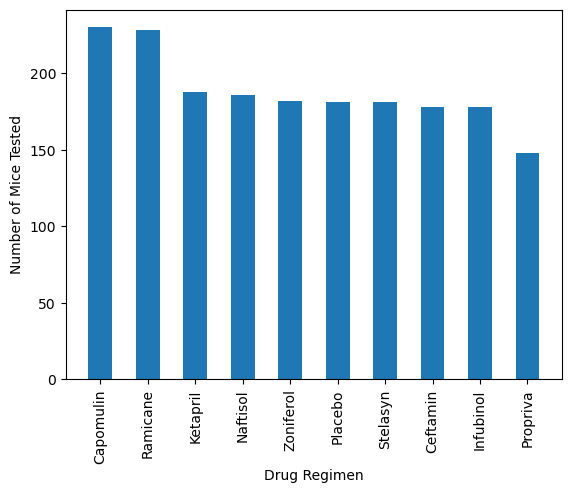

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(timepoints.index, timepoints['Timepoint'], width = 0.5)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")



<AxesSubplot:ylabel='Sex'>

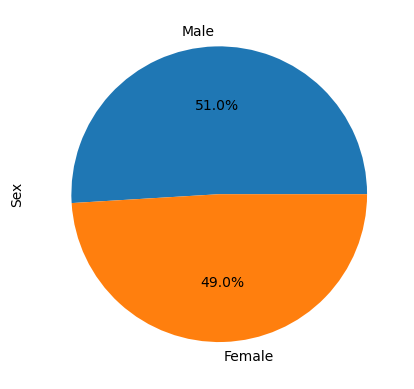

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
distribution = clean_mice.groupby('Sex').count().sort_values(by=['Mouse ID'], ascending = False)
distribution.plot(kind='pie', y='Mouse ID', autopct = '%0.1f%%', ylabel = 'Sex', legend=False)


Text(0, 0.5, 'Sex')

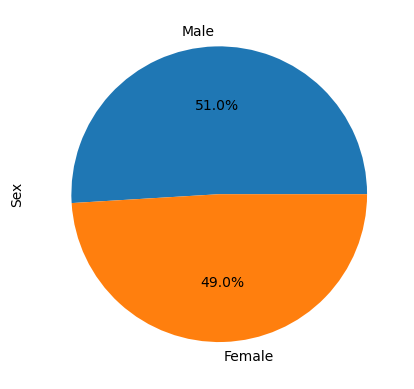

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(distribution['Mouse ID'], labels = distribution.index, autopct = '%0.1f%%')
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mice.groupby('Mouse ID', as_index=False).max()
last_timepoint = last_timepoint.loc[:,['Mouse ID','Timepoint']]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = last_timepoint.merge(clean_mice, how='inner', left_on= ['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'])
final_tumor_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filtered = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == drug].sort_values(by=['Tumor Volume (mm3)'])
    # add subset
    new_list = filtered['Tumor Volume (mm3)'].tolist()
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    q1 = st.scoreatpercentile(new_list, 25)
    q3 = st.scoreatpercentile(new_list, 75)
    iqr_drug = st.iqr(new_list)
    low_bound = q1 - 1.5*iqr_drug
    hi_bound = q3 + 1.5*iqr_drug
    outliers = []
    counter = len(new_list)
    #round for easy reading in output
    rq1= round(q1,3)
    rq3=round(q3,3)
    riqr = round(iqr_drug,3)
    rlo=round(low_bound,3)
    rhi=round(hi_bound,3)
    # Determine outliers using upper and lower bounds
    for x in new_list:
        if x > hi_bound:
            outliers.append(x)
        elif x < low_bound:
            outliers.append(x)
    tumor_vol.append(new_list)
    print(f'{drug} - q1: {rq1}, q3: {rq3}, IQR: {riqr}, boundaries: {rlo} to {rhi}, Outliers: {outliers}.')
        

Capomulin - q1: 32.377, q3: 40.159, IQR: 7.782, boundaries: 20.705 to 51.832, Outliers: [].
Ramicane - q1: 31.56, q3: 40.659, IQR: 9.099, boundaries: 17.913 to 54.307, Outliers: [].
Infubinol - q1: 54.049, q3: 65.526, IQR: 11.477, boundaries: 36.833 to 82.741, Outliers: [36.3213458].
Ceftamin - q1: 48.722, q3: 64.3, IQR: 15.578, boundaries: 25.355 to 87.666, Outliers: [].


Text(0, 0.5, 'Final Tumor Volume (mm3)')

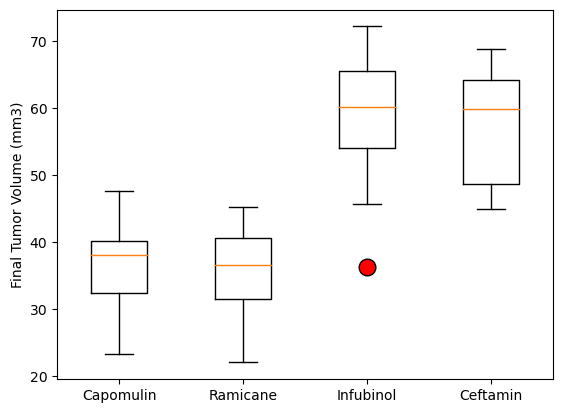

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots()
bp = ax1.boxplot(tumor_vol, vert=True, labels=treatments, flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'})
ax1.set_ylabel('Final Tumor Volume (mm3)')



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

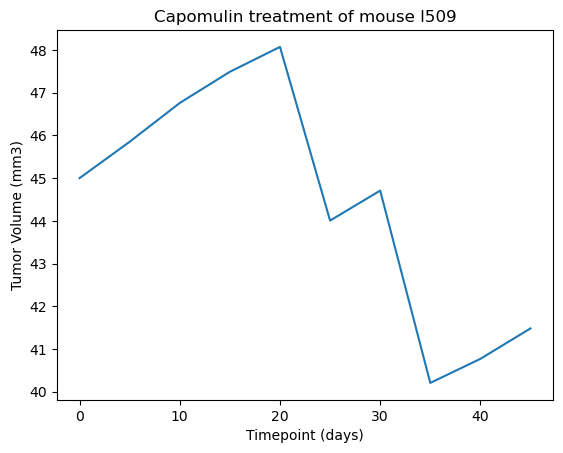

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
pick_mouse = clean_mice.loc[clean_mice['Mouse ID'] == 'l509']
plt.plot(pick_mouse['Timepoint'],pick_mouse['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509') 
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

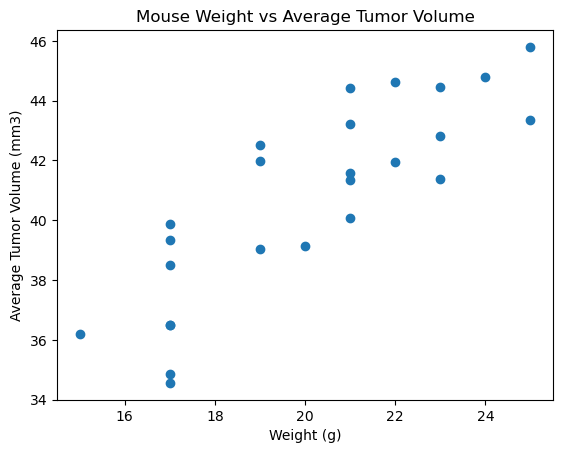

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_treated = clean_mice.loc[clean_mice['Drug Regimen'] == 'Capomulin']
capomulin_treated_grouped = capomulin_treated.groupby(['Mouse ID'], as_index=False).mean()
plt.scatter(capomulin_treated_grouped['Weight (g)'], capomulin_treated_grouped['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84 with a regression line of y = 0.95x + 21.55.


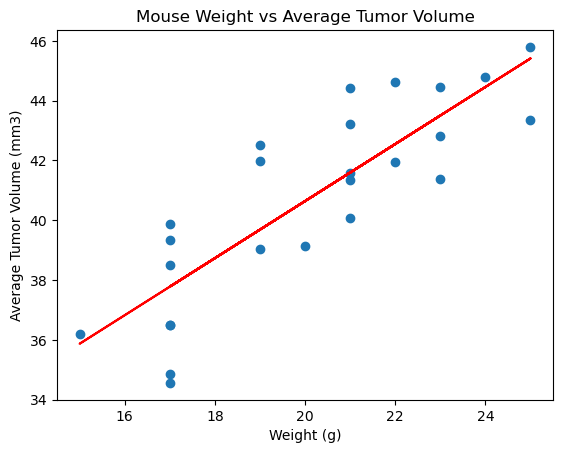

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_treated_grouped['Weight (g)'], capomulin_treated_grouped['Tumor Volume (mm3)'])
regress_values = capomulin_treated_grouped['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rrvalue = round(rvalue,2)
plt.scatter(capomulin_treated_grouped['Weight (g)'], capomulin_treated_grouped['Tumor Volume (mm3)'])
plt.plot(capomulin_treated_grouped['Weight (g)'],regress_values,"r-")
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The correlation coefficient between mouse weight and average tumor volume is {rrvalue} with a regression line of {line_eq}.')